#### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn import metrics

import warnings

# Suppress Matplotlib warnings
warnings.filterwarnings('ignore', category=UserWarning)

#### Analyses of given DataSet

In [2]:
dataFrame = pd.read_csv('avocado.csv')
dataFrame.info()
dataFrame.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [3]:
dataFrame.describe().transpose().applymap(lambda x: format(x, '.3f'))

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18249.000,24.232,15.481,0.000,10.000,24.000,38.000,52.000
AveragePrice,18249.000,1.406,0.403,0.440,1.100,1.370,1.660,3.250
Total Volume,18249.000,850644.013,3453545.355,84.560,10838.580,107376.760,432962.290,62505646.520
4046,18249.000,293008.425,1264989.082,0.000,854.070,8645.300,111020.200,22743616.170
4225,18249.000,295154.568,1204120.401,0.000,3008.780,29061.020,150206.860,20470572.610
4770,18249.000,22839.736,107464.068,0.000,0.000,184.990,6243.420,2546439.110
Total Bags,18249.000,239639.202,986242.399,0.000,5088.640,39743.830,110783.370,19373134.370
Small Bags,18249.000,182194.687,746178.515,0.000,2849.420,26362.820,83337.670,13384586.800
Large Bags,18249.000,54338.088,243965.965,0.000,127.470,2647.710,22029.250,5719096.610
XLarge Bags,18249.000,3106.427,17692.895,0.000,0.000,0.000,132.500,551693.650


In [4]:
dataFrame = dataFrame.drop('Unnamed: 0', axis=1)

In [5]:
dataFrame

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


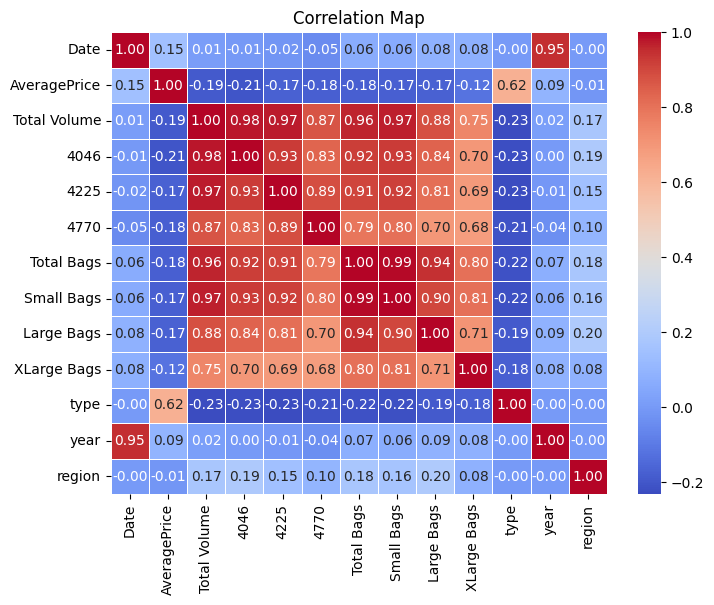

In [6]:
non_numeric_columns = ['Date', 'type', 'region']

# Convert non numeric columns
label_encoder = LabelEncoder()
dataFrame[non_numeric_columns] = dataFrame[non_numeric_columns].apply(lambda col: label_encoder.fit_transform(col))

# Calculate the correlation matrix
correlation_matrix = dataFrame.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Map')
plt.show()

#### Decision Tree 

In [7]:
# Calculate correlation coefficients
correlation_matrix = dataFrame.corr()
correlation_with_target = correlation_matrix['AveragePrice'].abs().sort_values(ascending=False)

In [8]:
# Choose the top two features with the highest absolute correlation
top_features = correlation_with_target[1:3].index

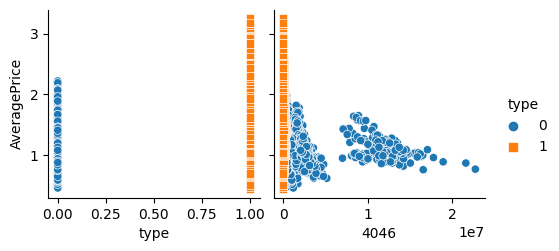

In [9]:
# Create the decision boundary graph
sns.pairplot(dataFrame, x_vars=top_features, y_vars='AveragePrice', hue='type', markers=["o", "s"])
plt.show()

Тут видно что органические авокадо стоят дороже а не органические дешевле,а также то что вид авокадо под номером 4046 весь не органический и его цена средняя относительно других видов авокадо

In [10]:
X=dataFrame[['type', '4046']]
y=dataFrame[['AveragePrice']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [11]:
# Hyperparameters to explore
hyperparameters = {
    'max_depth': np.arange(1, 100),
    'min_samples_split': np.arange(2, 100),
    'min_samples_leaf': np.arange(1, 100),
    'min_weight_fraction_leaf': np.linspace(0, 0.5, 11),
    'max_features': np.arange(2,100),
    'max_leaf_nodes': np.arange(2, 100),
    'min_impurity_decrease': np.arange(0.01, 100)
}

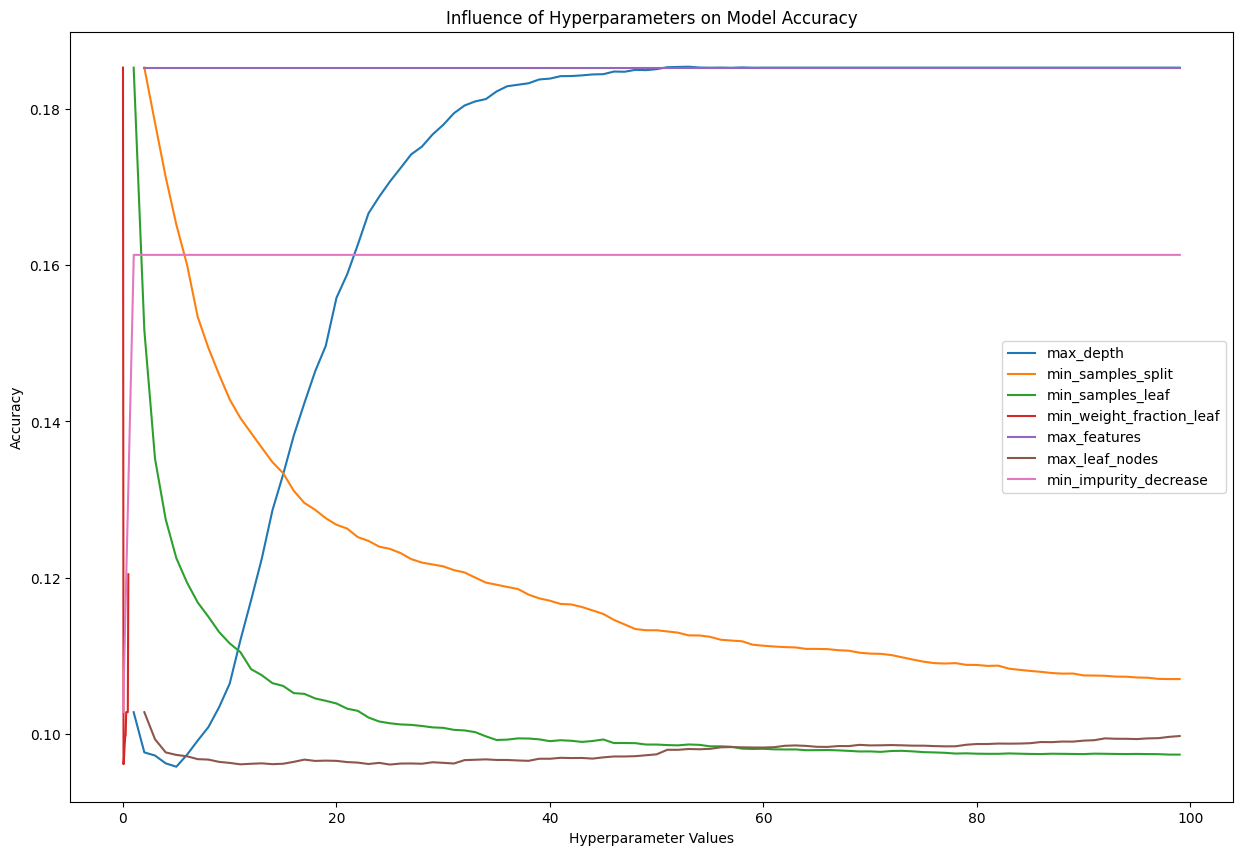

In [12]:
# Plotting
plt.figure(figsize=(15, 10))

for hyperparameter, values in hyperparameters.items():
    accuracies = []

    for value in values:
        # Create a DecisionTreeClassifier with the specific hyperparameter value
        clf = DecisionTreeRegressor(**{hyperparameter: value})
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = metrics.mean_squared_error(y_test, y_pred)
        accuracies.append(accuracy)

    # Plotting the line
    plt.plot(values, accuracies, label=hyperparameter)

plt.xlabel('Hyperparameter Values')
plt.ylabel('Accuracy')
plt.title('Influence of Hyperparameters on Model Accuracy')
plt.legend()
plt.show()

In [13]:
best_model_DecisionTreeRegressor = DecisionTreeRegressor(max_depth=70,
                                                         min_samples_split=2,
                                                         min_samples_leaf=1,
                                                         min_weight_fraction_leaf=0,
                                                         max_features=2,
                                                         max_leaf_nodes=2,
                                                         min_impurity_decrease=20,
                                                         random_state=42)
best_model_DecisionTreeRegressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=70, max_features=2, max_leaf_nodes=2,
                      min_impurity_decrease=20, min_weight_fraction_leaf=0,
                      random_state=42)

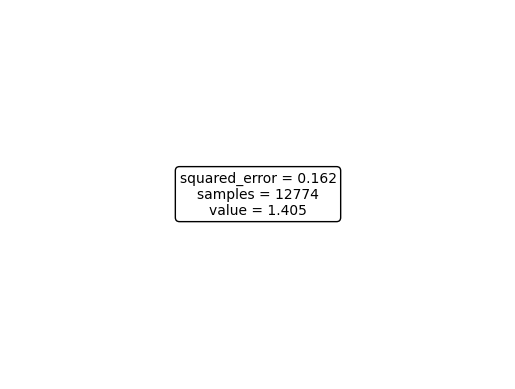

In [14]:
plot_tree(best_model_DecisionTreeRegressor, filled=True, rounded=True, fontsize=10)
plt.show()

#### Random Forest